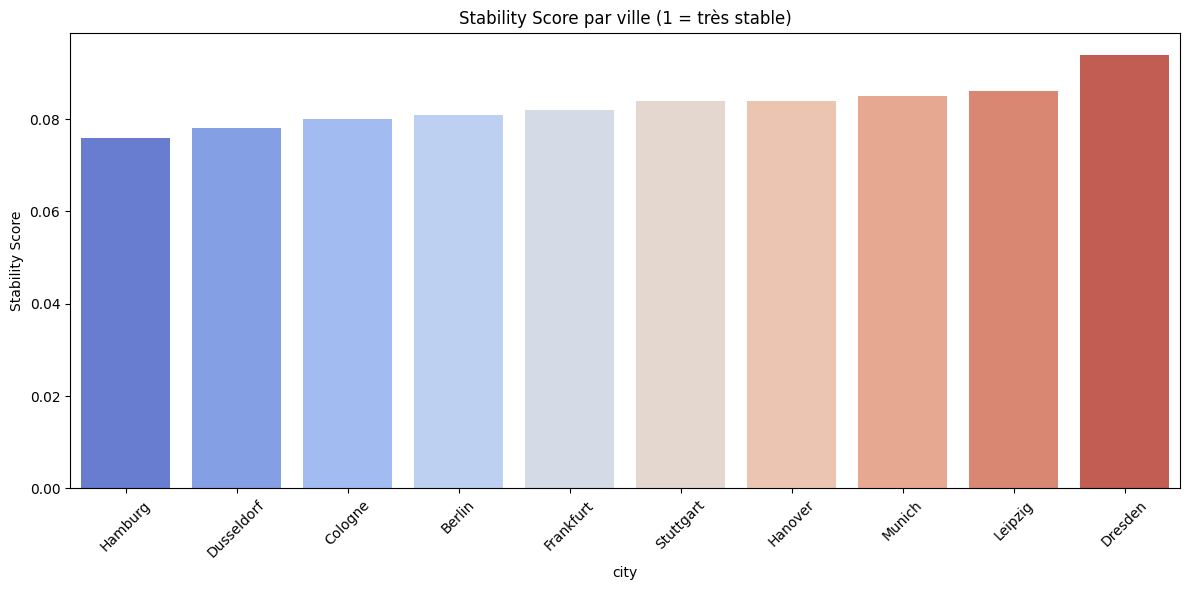

La ville la plus stable est : Dresden
La ville la moin stable est : Hamburg


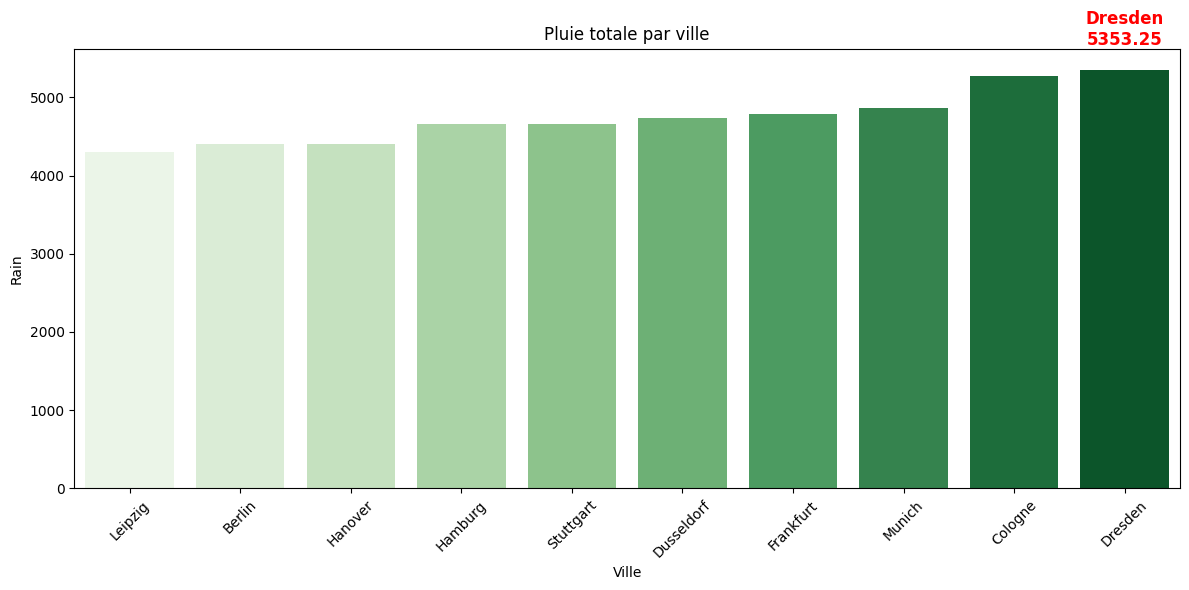

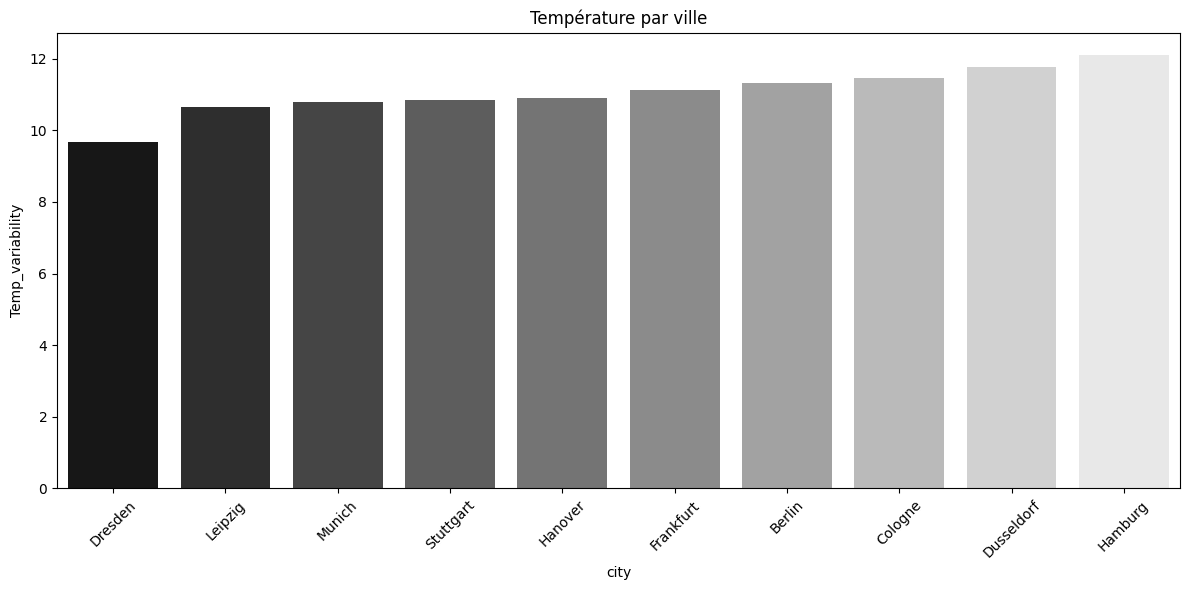

La ville avec un climat extrême est : Hamburg
La ville avec un climat modéré est : Dresden


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
from pathlib import Path
    

def plot_stability_score(df):
    df = df.sort_values(by="stability_score", ascending=True).reset_index(drop=True)
    plt.figure(figsize=(12,6))
    sns.barplot(data=df, x="city", y="stability_score", hue="city", palette="coolwarm", legend=False)
    plt.xticks(rotation=45)
    plt.title("Stability Score par ville (1 = très stable)")
    plt.ylabel("Stability Score")
    plt.tight_layout()
    plt.show()
    print(f'La ville la plus stable est : {(df.loc[df["stability_score"].idxmax()])["city"]}')
    print(f'La ville la moin stable est : {(df.loc[df["stability_score"].idxmin()])["city"]}')

def plot_temp(df):
    df = df.sort_values(by="temp_variability", ascending=True).reset_index(drop=True)
    plt.figure(figsize=(12,6))
    sns.barplot(data=df, x="city", y="temp_variability", hue="city", palette="grey", legend=False)
    plt.xticks(rotation=45)
    plt.title("Température par ville")
    plt.ylabel("Temp_variability")
    plt.tight_layout()
    plt.show()
    print(f'La ville avec un climat extrême est : {(df.loc[df["temp_variability"].idxmax()])["city"]}')
    print(f'La ville avec un climat modéré est : {(df.loc[df["temp_variability"].idxmin()])["city"]}')

def plot_rain(df, y_col, title, xlabel):
    plt.figure(figsize=(12, 6))
    df = df.sort_values(by=y_col, ascending=True).reset_index(drop=True)
    # Barplot avec une couleur par ville
    sns.barplot(data=df, x="city", y=y_col, hue="city", palette="Greens", legend=False)
    
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(y_col.replace('_', ' ').capitalize())
    plt.xticks(rotation=45)
    
    # Trouver la ville avec la valeur max
    max_row = df.loc[df[y_col].idxmax()]
    max_city = max_row['city']
    max_value = max_row[y_col]
    
    # Position x de la ville max (index)
    x_max = df.index[df['city'] == max_city][0]
    
    # Ajouter annotation texte au-dessus de la barre max
    plt.text(x_max, max_value + max_value*0.05, f"{max_city}\n{max_value:.2f}",
             ha='center', va='bottom', fontsize=12, fontweight='bold', color='red')
    
    plt.tight_layout()
    plt.show()

def main():
    
    processing_date = datetime.now()
    date_str = processing_date.strftime("%Y-%m-%d")
    
    # Configuration des chemins
    project_root = Path().resolve().parent
    data_dir = project_root / "data"
    output_dir = data_dir / "processed" / date_str
    input_file = output_dir / "weather_metrics.csv"
    
    df = pd.read_csv(input_file)
    df.describe()

    plot_stability_score(df)
    plot_rain(df, y_col="rain", title="Pluie totale par ville", xlabel="Ville")
    plot_temp(df)
    
if __name__ == "__main__":
    main()
